In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [94]:
df = pd.read_csv('data/cleanMovies.csv', parse_dates = ['release_date'])

**Pensando en que la mejor manera de recomendar sería en función de palabras y generos se preocede indagando los campos de overview, title y genres**

In [95]:
df['overview'] = df['overview'].apply(lambda x: str(x) if pd.notnull(x) else "")
overviews = ' '.join(df['overview'])
titles = ' '.join(df['title'])

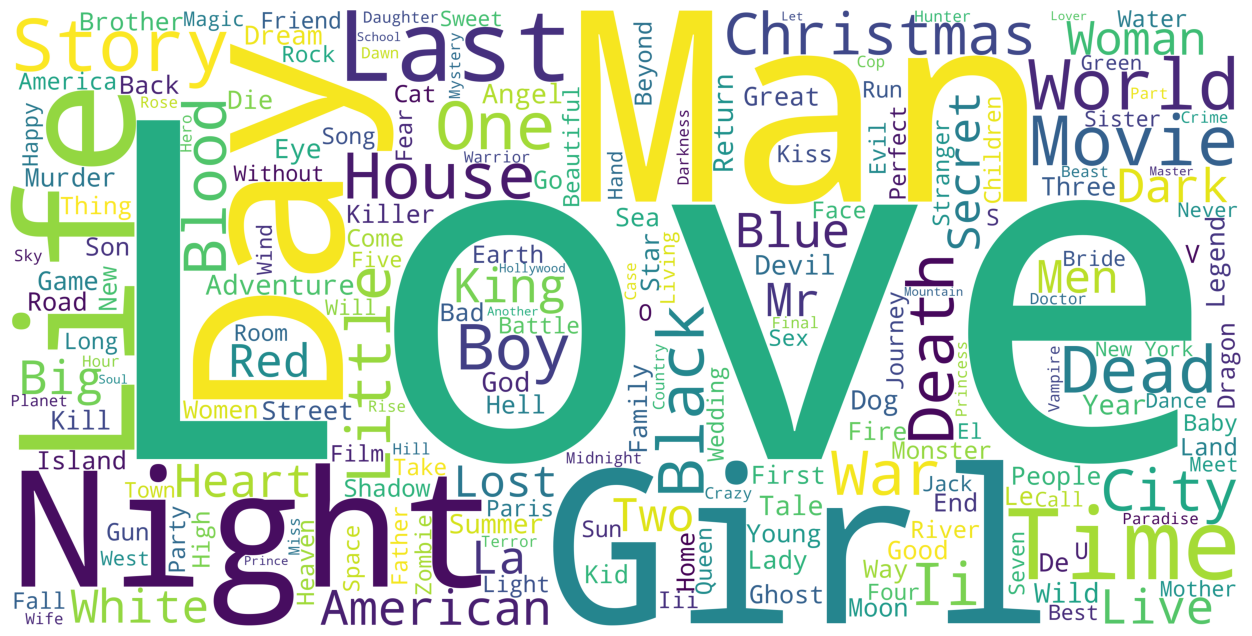

In [96]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(titles)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

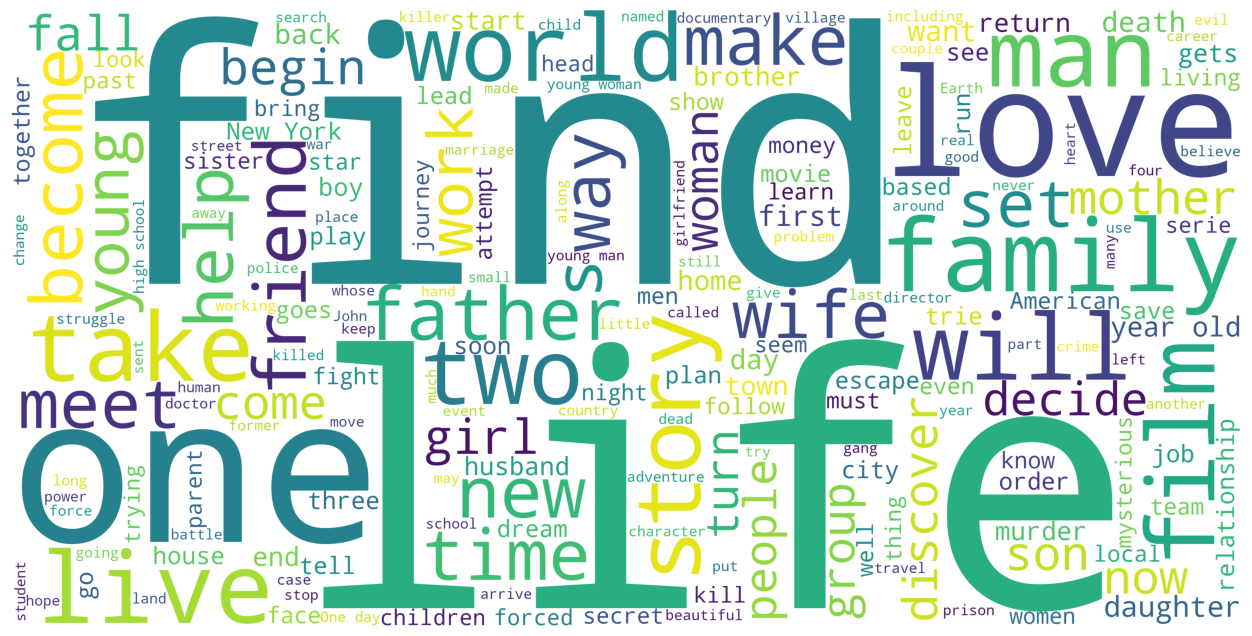

In [97]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overviews)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

**Observando las nubes de palabras se pueden observar que existe correlación entre las palabras que representan los titulos y sus . Además, se ve que el romance, la familia y la vida son temas habituales.**

In [98]:
df['genres'] = df['genres'].apply(lambda x: eval(x))

In [99]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'generos'

In [100]:
generos = (df.join(s))['generos'].value_counts()

In [101]:
generos.shape

(20,)

In [102]:
generos

generos
Drama              20234
Comedy             13175
Thriller            7614
Romance             6728
Action              6588
Horror              4668
Crime               4302
Documentary         3919
Adventure           3488
Science Fiction     3037
Family              2765
Mystery             2461
Fantasy             2309
Animation           1928
Foreign             1618
Music               1597
History             1397
War                 1322
Western             1042
TV Movie             765
Name: count, dtype: int64

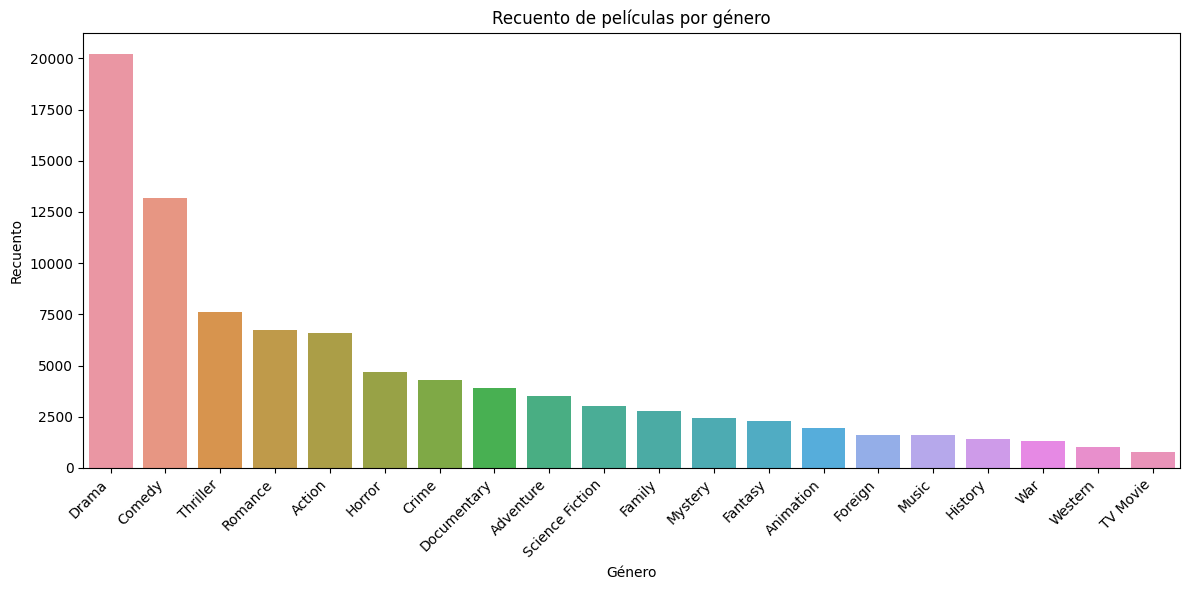

In [103]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=generos.index, y=generos.values, ax=ax)

ax.set_title('Recuento de películas por género')
ax.set_xlabel('Género')
ax.set_ylabel('Recuento')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Se puede ver lo que se predijo al principio en función de las palabras, se destacan los generos de drama y comedia**

**Por otro lado se analizó los días en que se estrenan las peliculas**

In [104]:
df['dia'] = df['release_date'].apply(lambda x: x.strftime('%A'))

<Axes: title={'center': 'Estrenos por día de la semana'}, xlabel='dia', ylabel='count'>

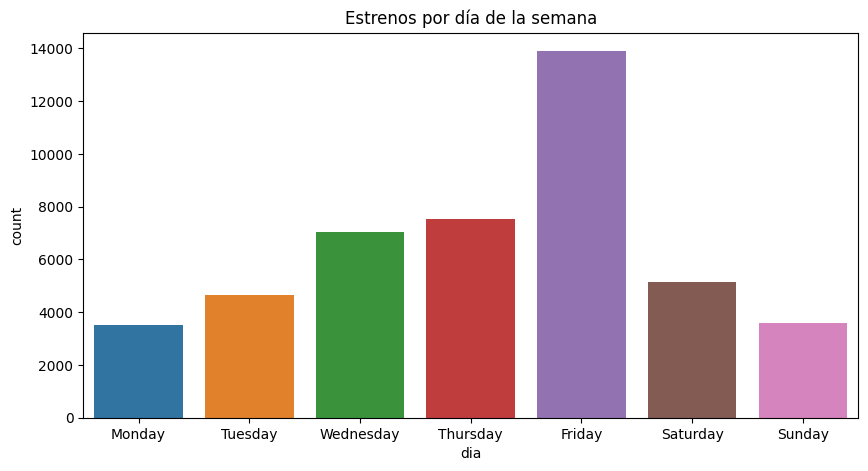

In [105]:
plt.figure(figsize=(10,5))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.title("Estrenos por día de la semana")
sns.countplot(x='dia', data=df, order=day_order)

**Clarmente los estrenos suelen ser los viernes para acaparar mayor publico**

**Otro punto a mencionar, de la mano de los días es la distribución por años del lanzamiento de peliculas**

<Axes: xlabel='release_year'>

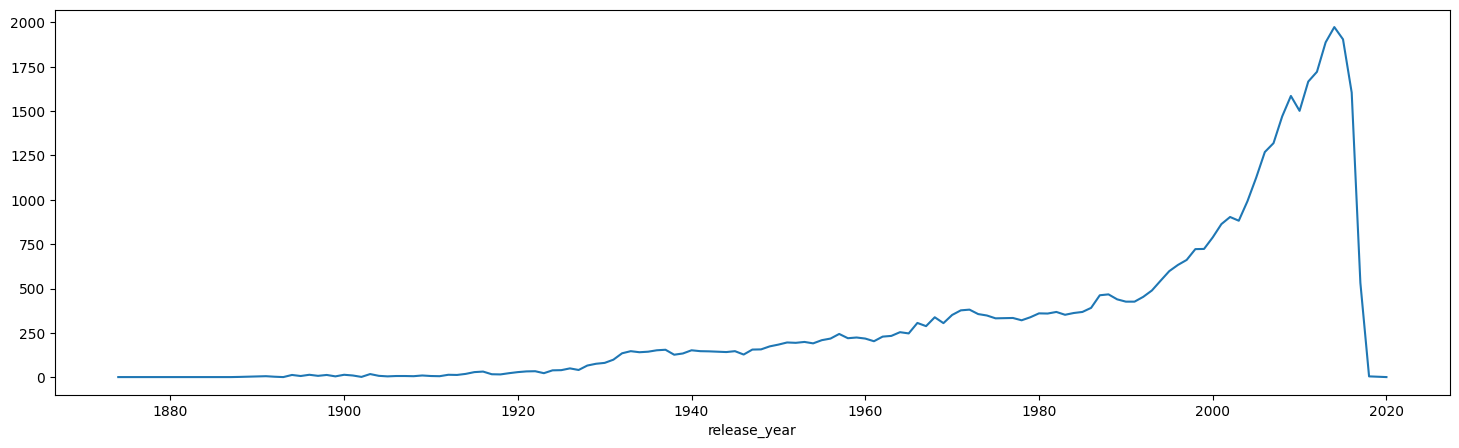

In [106]:
years = df.groupby('release_year')['title'].count()
plt.figure(figsize=(18,5))
years.plot()

**Suponiendo que la fidelidad de los datos es buena, y se encuentran bien representada la cantidad de peliculas por años, podemos notar que a fines de los 90 hay un aumento bien marcado en el lanzamiento de peliculas**

**Otra de las variables númericas que podrían ser de utilidad en los modelos es la popularidad, dada la influencia de esta en las decisiones de visualización**

In [107]:
df['popularity'].describe()

count    45346.000000
mean         2.926188
std          6.010970
min          0.000000
25%          0.388732
50%          1.130176
75%          3.689337
max        547.488298
Name: popularity, dtype: float64

Se observa un claro sesgo en los valores, pudiendose tratar de outliers, además de que se observa que la mayoria (percentil 75) de las peliculas se encuentran por debajo de 10

<Axes: ylabel='Frequency'>

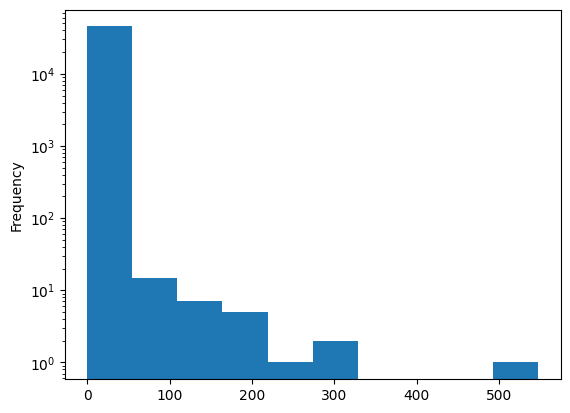

In [108]:
df['popularity'].plot(logy=True, kind='hist')

In [109]:
df[['title', 'popularity', 'release_year']].sort_values('popularity', ascending=False).head(15)

,title,popularity,release_year
30644,Minions,547.488298,2015
33295,Wonder Woman,294.337037,2017
42124,Beauty And The Beast,287.253654,2017
43540,Baby Driver,228.032744,2017
24410,Big Hero 6,213.849907,2014
26517,Deadpool,187.860492,2016
26519,Guardians Of The Galaxy Vol. 2,185.330992,2017
14540,Avatar,185.070892,2009
24306,John Wick,183.870374,2014
23632,Gone Girl,154.801009,2014


**Observando estos datos podemos definir la causa de la amplitud, dado que tiene sentido que la pelicula Minions tenga ese valor en popularidad**

Esto deja en evidencia la necesidad de escalar datos en el caso de optar por las variables que presenten estos casos de extremos elevados

Analizando de la misma forma las features de **votos** y vemos vemos que sucede algo similar, pero con otros titulos

In [110]:
df['vote_count'].describe()

count    45346.000000
mean       110.135293
std        491.899276
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [111]:
df[['title', 'vote_count', 'release_year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,release_year
15467,Inception,14075.0,2010
12472,The Dark Knight,12269.0,2008
14540,Avatar,12114.0,2009
17799,The Avengers,12000.0,2012
26517,Deadpool,11444.0,2016
22838,Interstellar,11187.0,2014
20025,Django Unchained,10297.0,2012
23710,Guardians Of The Galaxy,10014.0,2014
2840,Fight Club,9678.0,1999
18224,The Hunger Games,9634.0,2012


In [112]:
df['vote_average'].describe()

count    45346.000000
mean         5.624196
std          1.915339
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_8684\20589440.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))


<Axes: xlabel='vote_average', ylabel='Density'>

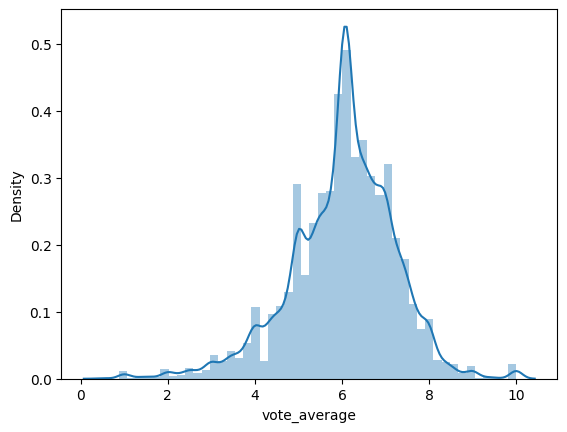

In [113]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

**Se puede ver que los valores rondedan de 0 a 10, por lo que no hay valores extraños en esta parte del datset**

**Otro aspecto que podemos observar es la distribución y por ende la correlación entre los votos y el promedio generado**

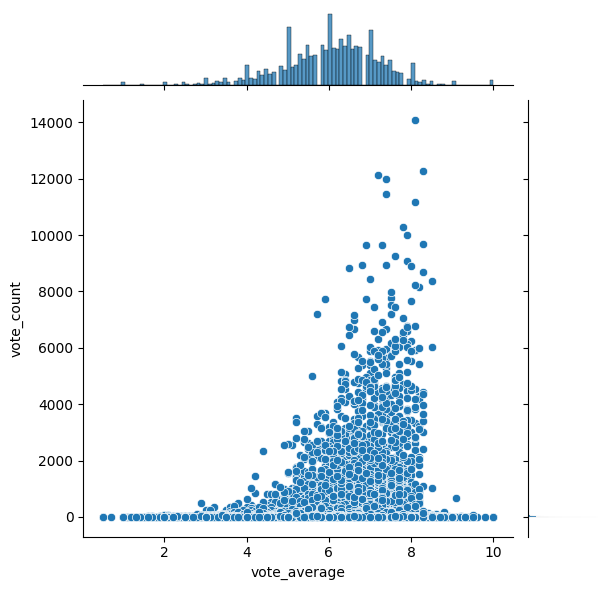

In [114]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

**Si bien se observa una tendencia no podemos asegurar que porque se tenga muchos votos la peliculas va a ser buena, ya que se observa que no hay una clara correlación entre la cantidad de votos y el promedio de estos.**

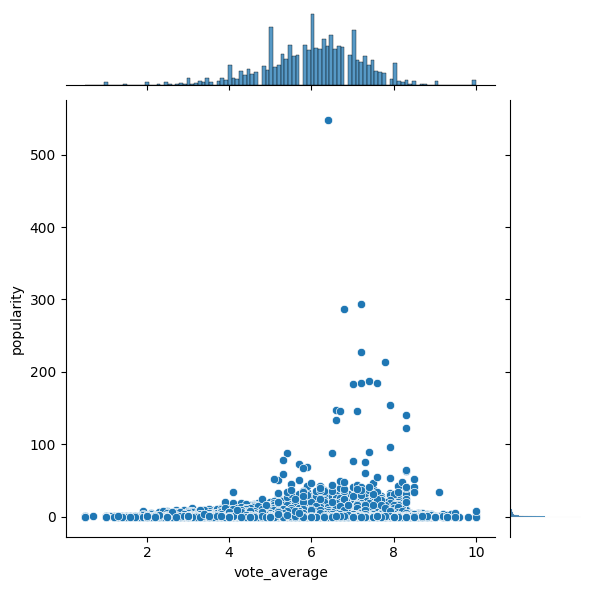

In [115]:
sns.jointplot(x='vote_average', y='popularity', data=df)

**En el caso de la popularidad y el promedio de los votos no existe una correlación que valga la pena mencionar.**

**Otra información que podía ser de utilidad son las colecciones o franquicias de las peliculas, si aplica**

In [116]:
df_col = df[df['belongs_to_collection'].notnull()]

In [117]:
colections_info = df_col.pivot_table(index='belongs_to_collection', values='budget', aggfunc={'budget': ['mean', 'sum', 'count']}).reset_index()

In [118]:
colections_info.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,5.921731e+07,1.539650e+09
552,Harry Potter Collection,8,1.600000e+08,1.280000e+09
968,Pirates of the Caribbean Collection,5,2.500000e+08,1.250000e+09
1317,The Fast and the Furious Collection,8,1.261250e+08,1.009000e+09
1656,X-Men Collection,6,1.638333e+08,9.830000e+08
1550,Transformers Collection,5,1.930000e+08,9.650000e+08
1160,Star Wars Collection,8,1.067938e+08,8.543500e+08
1352,The Hobbit Collection,3,2.500000e+08,7.500000e+08
1483,The Terminator Collection,5,1.322800e+08,6.614000e+08
835,Mission: Impossible Collection,5,1.300000e+08,6.500000e+08


Se puede ver que en cuanto a costos, lo cual tiene sentido por el numero de filmaciones, james bond y Harry Potter estan a la cabeza

In [119]:
colections_info2 = df_col.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [120]:
colections_info2.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,6,6.151784e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


**Sin embargo en ganancias Harry Potter esta a la cabeza seguido de Star Wars, que se encontraba en e puesto 7 en cuanto a costos**

**Analizados los puntos se procede al desarrollo de los modelos de ML, se pleantaron 2, ambos presentes en ml_models.py**